# Naive Bayes classification model
- 대표적인 생성 모형

## 나이브 가정
1. 독립 변수 x가 다차원이면 likelihood로 모든 x에 대한 결합확률을 사용해야한다. 
1. 하지만 고차원일 수록 다차원 결합 확률은 **실제로 구하기 어렵기 때문에** 
1. 개별 독립 변수 요소들이 **서로 독립이라는 가정**을 사용한다.

---

### 가우시안 정규 분포 likelihood 모형 

1. x 벡터의 원소가 모두 실수이고 
1. 클래스마다 특정 값 주변에서 발생한다고 하면 
1. 가우시안 정규 분포 likelihood 모형을 사용한다.


- 각 원소 $x_i$, 클래스 $k$마다 정규분포의 기댓값 $\mu_{i,k}$, 표준 편차 $\sigma_{i,k}$가 달라진다.

$$ P(x_i \mid y = C_k) = \dfrac{1}{\sqrt{2\pi\sigma_{i,k}^2}} \exp \left(-\dfrac{(x_i-\mu_{i,k})^2}{2\sigma_{i,k}^2}\right) $$

### 베르누이 분포 Likelihood 모형

1. 각각의 $x = (x_1,\ldots, x_D)$의 각 원소 $x_i$가 0 또는 1이라는 값만 가진다.
1. 즉, 독립 변수는 D개의 독립적인 베르누이 확률 변수다.
1. 이 동전들의 모수 $\theta_i$는 동전 $i$마다 다르다.



>1. 또한 클래스 $y = C_k (k=1,\ldots,K)$ 마다도 $x_i$가 1이 될 확률이 다르다.
1. 즉, 동전의 모수 $\theta_{i, k}$는 동전$i$마다, 클래스 $k$마다 다르다.


1. 따라서 전체 $D \times K $의 동전이 존재하며 
1. 같은 클래스에 속하는 $D$개의 동전이 `하나의 동전 세트`를 구성하고
1. 이러한 동전세트가 K개 있다고 생각할 수 있다.

$$P(x_i \mid y = C_k) = \theta_{i,k}^x (1-\theta_{i,k})^{(1-x_i)}$$

1. `동전 세트`마다 확률 특성이 다르므로
1. 베르누이분포 나이브 베이즈 모형은 동전 세트를 N번 던진 결과로부터
1. $ 1, 2, \dots, K $ 중 `어느 동전 세트를 던졌는지`(=클래스)를 찾아내는 모형

### 다항분포 Likelihood 모형

$x$ 벡터를 $D$개의 면을 가지는 주사위를 $\sum{x_i}$번 던져서 나온 결과로 가정


$$x = (1, 4, 0, 5)$$

4면체 주사위를 10번 던져서 1인 면 1번, 2면 4번...


1. 각 클래스마다 주사위가 다르다고 가정
1. K개의 클래스 구분 문제에서는 K개의 주사위
1. 따라서 다항분포 나이브베이즈 모형은 주사위를 던진 결과로부터
1. $1, 2, \cdots, K$ 중 `어느 주사위를 던졌는지` 찾아내는 모형

---

## Scikit-Learn  나이브 베이즈모형

### 사전 확률과 관련된 속성

- `classes_` : target Y의 클래스(라벨)
- `classes_count_` : target Y의 값이 특정한 클래스인 표본 데이터의 수
- `classes_prior_` : target Y의 무조건부 확률 분포 P(Y) (가우시안 정규 분포만)
- `classes_log_prior` : target Y의 무조건부 확률 분포의 logP(Y) (베르누이, 다항 분포)

### Likelihood 추정 속성

- `theta_`, `sigma_`

    - 가우시안 정규 분포의 기댓값  μ  과 분산  σ2  (가우시안 정규 분포의 경우에만)
- `feature_count_`
    - 베르누이 분포 혹은 다항 분포의 각 독립변수값이 나타난 횟수 (베르누이 분포나 다항 분포의 경우에만)
- `feature_log_prob_`
    - 베르누이 분포 혹은 다항 분포의 모수 벡터의 로그 (베르누이 분포나 다항 분포의 경우에만)
    
표본 데이터의 수가 적은 경우 다음과 같이 스무딩(smoothing)을 할 수도 있다.

$$\hat{\theta} = \frac{ N_{i} + \alpha}{N + \alpha K}$$

## 가우시안 정규 분포 나이브 베이즈 모형

In [1]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

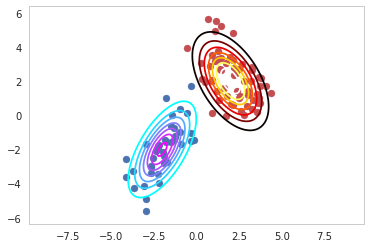

In [2]:
%matplotlib inline
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

In [3]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [4]:
model_norm.classes_, model_norm.class_count_

(array([0., 1.]), array([40., 60.]))

In [5]:
model_norm.class_prior_

array([0.4, 0.6])

각 클래스에 따라 x가 이루는 확률 분포의 모수

In [6]:
model_norm.theta_, model_norm.sigma_

(array([[-1.96197643, -2.00597903],
        [ 2.19130701,  2.12626716]]), array([[1.02398854, 2.31390497],
        [1.25429371, 1.93742544]]))

위에서 구한 모수로 만든 분포 두개

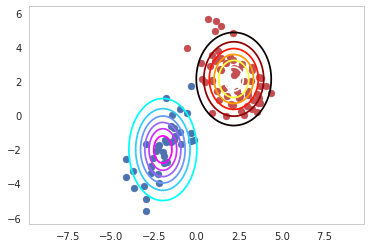

In [7]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

`predict_proba`로 각 클래스값이 나올 확률 계산
- y=0일 확률이 0.98

In [8]:
x_new = [-0.7, -0.8]
model_norm.predict_proba([x_new])

array([[0.98300323, 0.01699677]])

값이 나오게 된 중간 과정

In [9]:
likelihood = [sp.stats.norm(model_norm.theta_[0], 
                    np.sqrt(model_norm.sigma_[0])).pdf(x_new).prod(),
                    sp.stats.norm(model_norm.theta_[1], 
                    np.sqrt(model_norm.sigma_[1])).pdf(x_new).prod()]
likelihood

[0.0346968402917242, 0.0003999540815189114]

사전확률 * likelihood = 사후 확률

In [10]:
posterior = likelihood * model_norm.class_prior_ 
posterior

array([0.01387874, 0.00023997])

값을 정규화. `predict_proba` 메서드와 같은 값이 나온다.

In [11]:
posterior / posterior.sum()

array([0.98300323, 0.01699677])

---

## 베르누이 분포 나이브 베이즈 모형
타겟 변수뿐 아니라 독립 변수도 0 또는 1의 값을 가져야한다.

In [12]:
np.random.seed(0)
X = np.random.randint(2, size=(10, 4))
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [13]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [14]:
model_bern.classes_

array([0, 1])

In [15]:
model_bern.class_count_

array([4., 6.])

In [16]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

1. 각 클래스 별로, 독립 변수 별로 다른 베르누이 확률 변수라고 가정
1. 각 베르누이 확률 변수의 모수 추정

In [17]:
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [18]:
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [19]:
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

feature_log_prob와 다른 이유?
- smoothing. 

    - 0과 1이 나오는 가상의 데이터를 추가하여 추정한 모수 값이 좀 더 0.5에 가까워지도록 하는 방법

### 테스트 데이터 예측

In [20]:
x_new = np.array([1, 1, 0, 0])
model_bern.predict_proba([x_new]) 

array([[0.72480181, 0.27519819]])

In [21]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1)\
    *np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.72480181, 0.27519819])

다른 데이터

In [22]:
x_new = np.array([0, 0, 1, 1])
model_bern.predict_proba([x_new])

array([[0.09530901, 0.90469099]])

In [23]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1)\
    *np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.09530901, 0.90469099])

---

## 다항 분포 나이브 베이즈 모형